In [3]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap, MarkerCluster
from math import radians, sin, cos, sqrt, atan2

In [4]:
# Read data from the file
file_path = 'data/merged_real_estate_listings.csv'
df = pd.read_csv(file_path)
df.head()

,Id,Date Posted,Product Title,Price,Area,Price per m²,calc price,Bedrooms,Toilets,Location,Coordinates
0,42192442,17/02/2025,"Hoa hậu! Tập thể Bách Khoa, Hai Bà Trưng, tầng...",3.990,70.0,57.00,0.000,2.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0064972996948, 105.846686151416"
1,41627924,23/02/2025,Không có căn thứ 2 - căn hộ TT 80m2 full nội t...,4.200,80.0,52.50,0.000,3.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0054496563194, 105.84602951535"
2,37893530,21/02/2025,Bán cắt lỗ - chung cư E1 Đại Cồ Việt - Đại học...,0.972,58.0,16.76,-0.002,2.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0081158, 105.8460805"
3,42232438,21/02/2025,Bán căn hộ tập thể tầng 5 đã thông tầng 6 than...,3.500,100.0,35.00,0.000,4.0,3.0,"Bách Khoa, Hai Bà Trưng","21.0324711431819, 105.846972143071"
4,42213980,21/02/2025,Chính chủ bán căn hộ CC 70 Võ Thị Sáu - quận H...,3.900,76.0,51.32,0.000,2.0,1.0,"Bách Khoa, Hai Bà Trưng","21.0056631315477, 105.854986940543"


In [14]:
# 1. Descriptive Statistics
descriptive_stats = df[df['Price'] > 0].describe().round(2)
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                Id    Price     Area  Price per m²  calc price  Bedrooms  \
count      8894.00  8894.00  8894.00       8894.00     8894.00   8657.00   
mean   41302089.76     6.88    93.70         70.40       -0.00      2.61   
std     2126023.69     6.56    45.65         34.39        0.00      1.48   
min     6809616.00     0.08    13.00          1.02       -0.01      1.00   
25%    41418098.75     4.00    68.22         54.29        0.00      2.00   
50%    42101623.00     5.68    85.00         64.76        0.00      2.00   
75%    42199702.00     7.80   110.00         79.52        0.00      3.00   
max    42248030.00   145.00   750.00        953.95        0.01     45.00   

       Toilets  
count  8369.00  
mean      2.06  
std       1.39  
min       1.00  
25%       2.00  
50%       2.00  
75%       2.00  
max      45.00  


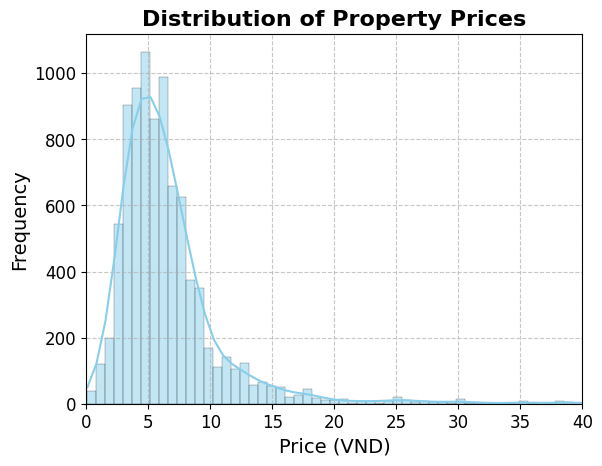

In [15]:
# 2. Price Distribution
plt.figure()
sns.histplot(df[df['Price'] > 0]['Price'], bins=200, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price (VND)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 40)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

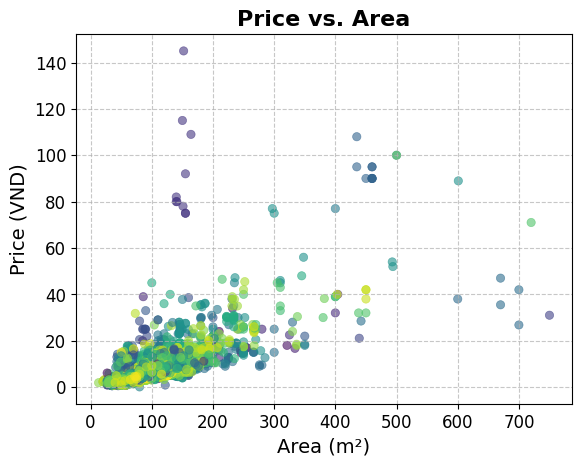

In [9]:
# 3. Price vs. Area
plt.figure()
sns.scatterplot(x='Area', y='Price', data=df[df['Price'] > 0], hue='Location', palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Price vs. Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Price (VND)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Disable legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [20]:
# 5. Location Analysis
location_stats = df.groupby('Location').agg({'Price': 'mean', 'Area': 'mean'}).reset_index()
print("Location Analysis:")
location_stats

Location Analysis:


,Location,Price,Area
0,"Bách Khoa, Hai Bà Trưng",3.896200,89.100000
1,"Bạch Mai, Hai Bà Trưng",2.332000,54.800000
2,"Bạch Đằng, Hai Bà Trưng",3.863846,144.692308
3,"Bưởi, Tây Hồ",4.953750,58.250000
4,"Bồ Đề, Long Biên",7.594878,121.156098
...,...,...,...
138,"Đại Kim, Hoàng Mai",3.509178,80.940868
139,"Đại Mỗ, Nam Từ Liêm",4.085625,83.134375
140,"Định Công, Hoàng Mai",3.927258,76.804839
141,Đống Đa,5.200000,66.333333


In [ ]:
# Haversine formula for distance (in km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# City center: Hoàn Kiếm Lake
CENTER_LAT, CENTER_LON = 21.0285, 105.8521

# Filter valid data
geo_df = df[df['Coordinates'].notna() & (df['Price'] != -1)].copy()
geo_df[['Latitude', 'Longitude']] = geo_df['Coordinates'].str.split(',', expand=True).astype(float)
geo_df['Distance_km'] = geo_df.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], CENTER_LAT, CENTER_LON), axis=1
)
geo_df['Bedrooms'] = pd.to_numeric(geo_df['Bedrooms'], errors='coerce').fillna(0)
geo_df['Toilets'] = pd.to_numeric(geo_df['Toilets'], errors='coerce').fillna(0)

# Create base map
hanoi_map = folium.Map(location=[CENTER_LAT, CENTER_LON], zoom_start=11)

# 1. Circle Markers Layer (Price)
circle_group = folium.FeatureGroup(name='Circle Markers (Price)', show=True)
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Price: {row['Price']} tỷ đồng",
        color='red' if row['Price'] < 3.5 else 'blue' if 3.5 <= row['Price'] < 4.7 else 'green',
        fill=True,
        fill_opacity=0.7
    ).add_to(circle_group)
hanoi_map.add_child(circle_group)

# 2. Heatmap Layer (Price)
geo_df['Price_Norm'] = geo_df['Price'] / geo_df['Price'].max()
heatmap_group = folium.FeatureGroup(name='Heatmap (Price)', show=False)
HeatMap(
    data=geo_df[['Latitude', 'Longitude', 'Price_Norm']].values.tolist(),
    radius=15, blur=20, max_zoom=13
).add_to(heatmap_group)
hanoi_map.add_child(heatmap_group)

# 3. Marker Clusters Layer
cluster_group = folium.FeatureGroup(name='Marker Clusters', show=False)
marker_cluster = MarkerCluster().add_to(cluster_group)
for _, row in geo_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Product Title']} - Price: {row['Price']} tỷ",
        icon=folium.Icon(color='red' if row['Price'] > 3 else 'blue')
    ).add_to(marker_cluster)
hanoi_map.add_child(cluster_group)

# 4. Zone Price Map Layer
price_m2_df = df[df['Price per m²'] > 0].copy()
price_m2_df[['Latitude', 'Longitude']] = price_m2_df['Coordinates'].str.split(',', expand=True).astype(float)
price_m2_df['Lat_bin'] = (price_m2_df['Latitude'] // 0.02) * 0.02
price_m2_df['Lon_bin'] = (price_m2_df['Longitude'] // 0.02) * 0.02
grid_prices = price_m2_df.groupby(['Lat_bin', 'Lon_bin'])['Price per m²'].mean().reset_index()

def get_zone_color(price_per_m2):
    if price_per_m2 < 30: return 'green'
    elif 30 <= price_per_m2 < 50: return 'lightgreen'
    elif 50 <= price_per_m2 < 70: return 'yellow'
    elif 70 <= price_per_m2 < 100: return 'orange'
    elif 100 <= price_per_m2 < 150: return 'red'
    else: return 'darkred'

zone_group = folium.FeatureGroup(name='Price per m² Zones', show=False)
for _, row in grid_prices.iterrows():
    price = row['Price per m²']
    color = get_zone_color(price)
    folium.Circle(
        location=[row['Lat_bin'], row['Lon_bin']],
        radius=800,
        popup=f"Avg Price per m²: {price:.2f} triệu/m²",
        color=color,
        fill=True,
        fill_opacity=0.6,
        weight=2
    ).add_to(zone_group)
hanoi_map.add_child(zone_group)

# 5. Distance Layer
def get_distance_color(distance):
    if distance < 2: return 'darkblue'
    elif 2 <= distance < 5: return 'blue'
    elif 5 <= distance < 10: return 'purple'
    else: return 'gray'

distance_group = folium.FeatureGroup(name='Distance from Hoàn Kiếm Lake', show=False)
for _, row in geo_df.iterrows():
    distance = row['Distance_km']
    color = get_distance_color(distance)
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Distance: {distance:.2f} km\nPrice: {row['Price']} tỷ",
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(distance_group)
hanoi_map.add_child(distance_group)

# 6. Area Distribution Layer
def get_area_color(area):
    if area < 50: return 'lightblue'      # Small: < 50 m²
    elif 50 <= area < 100: return 'blue'  # Medium: 50-100 m²
    elif 100 <= area < 150: return 'purple'  # Large: 100-150 m²
    else: return 'darkpurple'             # Very Large: ≥ 150 m²

# Comfort Score: Weighted sum of Area, Bedrooms, Toilets (example weights)
geo_df['Comfort_Score'] = (geo_df['Area'] * 1.0) + (geo_df['Bedrooms'] * 0.5) + (geo_df['Toilets'] * 0.3)
geo_df['Comfort_Score'] = geo_df['Comfort_Score'].fillna(0)

area_group = folium.FeatureGroup(name='Area Distribution (Comfort)', show=False)
for _, row in geo_df[geo_df['Area'].notna()].iterrows():
    area = row['Area']
    radius = min(5 + area * 0.05, 20)  # Scale radius by area, cap at 20
    color = get_area_color(area)
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        popup=f"Area: {area:.1f} m²\nBedrooms: {row['Bedrooms']}\nToilets: {row['Toilets']}\nPrice: {row['Price']} tỷ\nComfort Score: {row['Comfort_Score']:.1f}",
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(area_group)
hanoi_map.add_child(area_group)

# Add legends
legend_html = '''
    <div style="position: fixed; 
    bottom: 150px; left: 50px; width: 200px; height: 240px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    ">  <b>Legends</b><br>
      <b>Price per m² Zones:</b><br>
      <i style="color:green">■</i> < 30 triệu/m²<br>
      <i style="color:lightgreen">■</i> 30-50 triệu/m²<br>
      <i style="color:yellow">■</i> 50-70 triệu/m²<br>
      <i style="color:orange">■</i> 70-100 triệu/m²<br>
      <i style="color:red">■</i> 100-150 triệu/m²<br>
      <i style="color:darkred">■</i> ≥ 150 triệu/m²<br>
      <b>Distance Layer:</b><br>
      <i style="color:darkblue">■</i> < 2 km<br>
      <i style="color:blue">■</i> 2-5 km<br>
      <i style="color:purple">■</i> 5-10 km<br>
      <i style="color:gray">■</i> ≥ 10 km<br>
      <b>Area Layer:</b><br>
      <i style="color:lightblue">■</i> < 50 m²<br>
      <i style="color:blue">■</i> 50-100 m²<br>
      <i style="color:purple">■</i> 100-150 m²<br>
      <i style="color:darkpurple">■</i> ≥ 150 m²
    </div>
'''
hanoi_map.get_root().html.add_child(folium.Element(legend_html))

# Add Layer Control
folium.LayerControl(collapsed=False).add_to(hanoi_map)

# Save combined map
hanoi_map.save('hanoi_real_estate_combined.html')
print("Combined map with area distribution layer saved as 'hanoi_real_estate_combined.html'")

# Analysis: Correlation of Area, Bedrooms, Toilets with Price
print("Correlation between Area and Price:", geo_df['Area'].corr(geo_df['Price']))
print("Correlation between Bedrooms and Price:", geo_df['Bedrooms'].corr(geo_df['Price']))
print("Correlation between Toilets and Price:", geo_df['Toilets'].corr(geo_df['Price']))
print("Correlation between Comfort Score and Price:", geo_df['Comfort_Score'].corr(geo_df['Price']))

Combined map with area distribution layer saved as 'hanoi_real_estate_combined.html'
Correlation between Area and Price: 0.7133643831509814
Correlation between Bedrooms and Price: 0.3158871597874473
Correlation between Toilets and Price: 0.27710142829730644
Correlation between Comfort Score and Price: 0.7156978676988183


In [ ]:
# Extract district from Location
geo_df['District'] = geo_df['Location'].str.split(',').str[0].str.strip()

# Create base map centered on Hanoi (Hoàn Kiếm Lake)
hanoi_map = folium.Map(location=[21.0285, 105.8521], zoom_start=11)

# 1. Wealth Indicator Layer (Average Price as Proxy for Earnings)
def get_wealth_color(price):
    if price < 2: return 'green'       # Low: < 2 tỷ
    elif 2 <= price < 4: return 'yellow'  # Medium: 2-4 tỷ
    elif 4 <= price < 6: return 'orange'  # High: 4-6 tỷ
    else: return 'red'                # Very High: ≥ 6 tỷ

district_prices = geo_df.groupby('District')[['Price', 'Price per m²']].mean().reset_index()
wealth_group = folium.FeatureGroup(name='Wealth Indicator (Avg Price)', show=True)
for _, row in district_prices.iterrows():
    district_data = geo_df[geo_df['District'] == row['District']]
    avg_lat = district_data['Latitude'].mean()
    avg_lon = district_data['Longitude'].mean()
    avg_price = row['Price']
    folium.Circle(
        location=[avg_lat, avg_lon],
        radius=500,
        popup=f"{row['District']}\nAvg Price: {avg_price:.2f} tỷ\nAvg Price/m²: {row['Price per m²']:.2f} triệu/m²",
        color=get_wealth_color(avg_price),
        fill=True,
        fill_opacity=0.6,
        weight=2
    ).add_to(wealth_group)
hanoi_map.add_child(wealth_group)

# 2. Listing Density Layer
def get_listing_color(count):
    if count < 10: return 'lightblue'   # Low: < 10 listings
    elif 10 <= count < 20: return 'blue' # Medium: 10-20
    elif 20 <= count < 50: return 'purple' # High: 20-50
    else: return 'darkpurple'          # Very High: ≥ 50

listing_counts = geo_df.groupby('District').size().reset_index(name='Listing_Count')
listing_group = folium.FeatureGroup(name='Listing Density', show=False)
for _, row in listing_counts.iterrows():
    district_data = geo_df[geo_df['District'] == row['District']]
    avg_lat = district_data['Latitude'].mean()
    avg_lon = district_data['Longitude'].mean()
    count = row['Listing_Count']
    folium.Circle(
        location=[avg_lat, avg_lon],
        radius=min(5 + count * 10, 300),  # Scale by count, cap at 2000
        popup=f"{row['District']}\nListings: {count}",
        color=get_listing_color(count),
        fill=True,
        fill_opacity=0.6,
        weight=2
    ).add_to(listing_group)
hanoi_map.add_child(listing_group)

# Add legend
legend_html = '''
    <div style="position: fixed; 
    bottom: 50px; left: 50px; width: 200px; height: 180px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    ">  <b>Legends</b><br>
      <b>Wealth Indicator (Avg Price):</b><br>
      <i style="color:green">■</i> < 2 tỷ<br>
      <i style="color:yellow">■</i> 2-4 tỷ<br>
      <i style="color:orange">■</i> 4-6 tỷ<br>
      <i style="color:red">■</i> ≥ 6 tỷ<br>
      <b>Listing Density:</b><br>
      <i style="color:lightblue">■</i> < 10 listings<br>
      <i style="color:blue">■</i> 10-20 listings<br>
      <i style="color:purple">■</i> 20-50 listings<br>
      <i style="color:darkpurple">■</i> ≥ 50 listings
    </div>
'''
hanoi_map.get_root().html.add_child(folium.Element(legend_html))

# Add Layer Control
folium.LayerControl(collapsed=False).add_to(hanoi_map)

# Save new map
hanoi_map.save('hanoi_additional_analyses.html')
print("New map with wealth and listing density saved as 'hanoi_additional_analyses.html'")

# Correlation Analysis
print("Correlation between Price per m² and Price (Proxy for Earnings):", 
      geo_df['Price per m²'].corr(geo_df['Price']))

New map with wealth and listing density saved as 'hanoi_additional_analyses.html'
Correlation between Price per m² and Price (Proxy for Earnings): 0.7226909328716312


,District,Listing_Count,Population (people),Population density (people/km2),Population (%)
0,Ba Đình,324,226315,24573,6.11
1,Bắc Từ Liêm,680,354364,7833,9.57
2,Cầu Giấy,1482,294235,23652,7.95
3,Hai Bà Trưng,567,304101,29639,8.21
4,Hoàn Kiếm,43,141687,26484,3.83
5,Hoàng Mai,932,540732,13454,14.61
6,Hà Đông,1584,382637,7708,10.33
7,Long Biên,652,337982,5625,9.13
8,Nam Từ Liêm,1980,282444,8780,7.63
9,Thanh Xuân,1332,293292,31984,7.92


,Metric,Value
0,Total Population of Hanoi,3702349


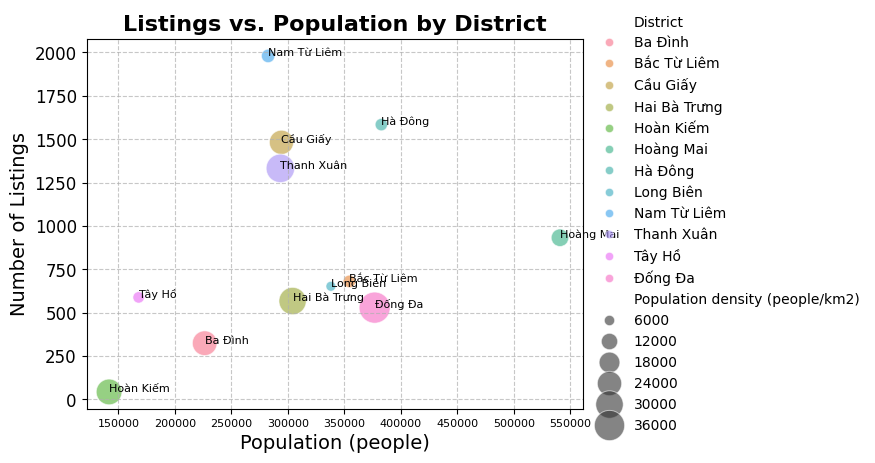

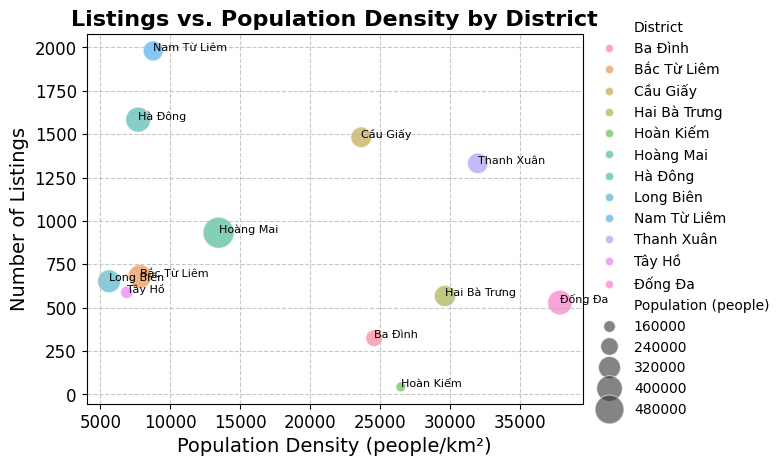

In [49]:
# Extract district from Location
df['District'] = df['Location'].str.split(',').str[-1].str.strip()
# Count listings per district
listing_counts = df.groupby('District').size().reset_index(name='Listing_Count')

# Load population data
pop_df = pd.read_csv('data/population_by_district.csv')

# Ensure district names match (standardize if needed)
pop_df['District'] = pop_df['District'].str.replace(' district', '').str.replace(' District', '').str.strip()
listing_counts['District'] = listing_counts['District'].str.strip()

# Merge datasets
merged_df = listing_counts.merge(pop_df, on='District', how='inner')

# Calculate total population of the city
total_population = merged_df['Population (people)'].sum()

# Calculate percentage of people living in each district
merged_df['Population (%)'] = merged_df['Population (people)'] / total_population * 100

# Merge the first and third tables
merged_table = merged_df[['District', 'Listing_Count', 'Population (people)', 'Population density (people/km2)', 'Population (%)']].round({'Population (%)': 2})

# Display the merged table
display(merged_table)

# Structure the total population as a proper table
total_pop_table = pd.DataFrame({
    'Metric': ['Total Population of Hanoi'],
    'Value': [total_population]
})
display(total_pop_table)

# Scatter plot: Listings vs. Population
plt.figure()
sns.scatterplot(x='Population (people)', y='Listing_Count', hue='District', size='Population density (people/km2)', 
                data=merged_df, sizes=(50, 500), alpha=0.6)
plt.title('Listings vs. Population by District', fontsize=16, fontweight='bold')
plt.xlabel('Population (people)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Disable legend
for i, row in merged_df.iterrows():
    plt.text(row['Population (people)'], row['Listing_Count'], row['District'], fontsize=8)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)  # Move legend to the right
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

# Scatter plot: Listings vs. Population Density
plt.figure()
sns.scatterplot(x='Population density (people/km2)', y='Listing_Count', hue='District', size='Population (people)', 
                data=merged_df, sizes=(50, 500), alpha=0.6)
plt.title('Listings vs. Population Density by District', fontsize=16, fontweight='bold')
plt.xlabel('Population Density (people/km²)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Disable legend
for i, row in merged_df.iterrows():
    plt.text(row['Population density (people/km2)'], row['Listing_Count'], row['District'], fontsize=8)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)  # Move legend to the right
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

,District,Price,Price per m²,Area,Comfort_Score,Price_per_Comfort,Listing_Count
10,Tây Hồ,10.00,93.63,100.0,69.4,0.1440,455
1,Bắc Từ Liêm,6.43,67.57,95.0,64.3,0.1000,543
3,Hai Bà Trưng,6.60,76.84,93.0,64.1,0.1029,492
2,Cầu Giấy,7.00,69.41,95.0,64.1,0.1092,1231
9,Thanh Xuân,7.00,74.46,94.0,63.4,0.1103,1187
0,Ba Đình,9.10,100.00,85.0,59.4,0.1532,241
7,Long Biên,4.50,55.68,79.0,54.1,0.0833,586
8,Nam Từ Liêm,5.10,64.29,80.0,53.2,0.0958,1717
11,Đống Đa,5.00,69.44,76.0,52.3,0.0956,430
6,Hà Đông,4.30,52.00,78.0,51.0,0.0843,1091


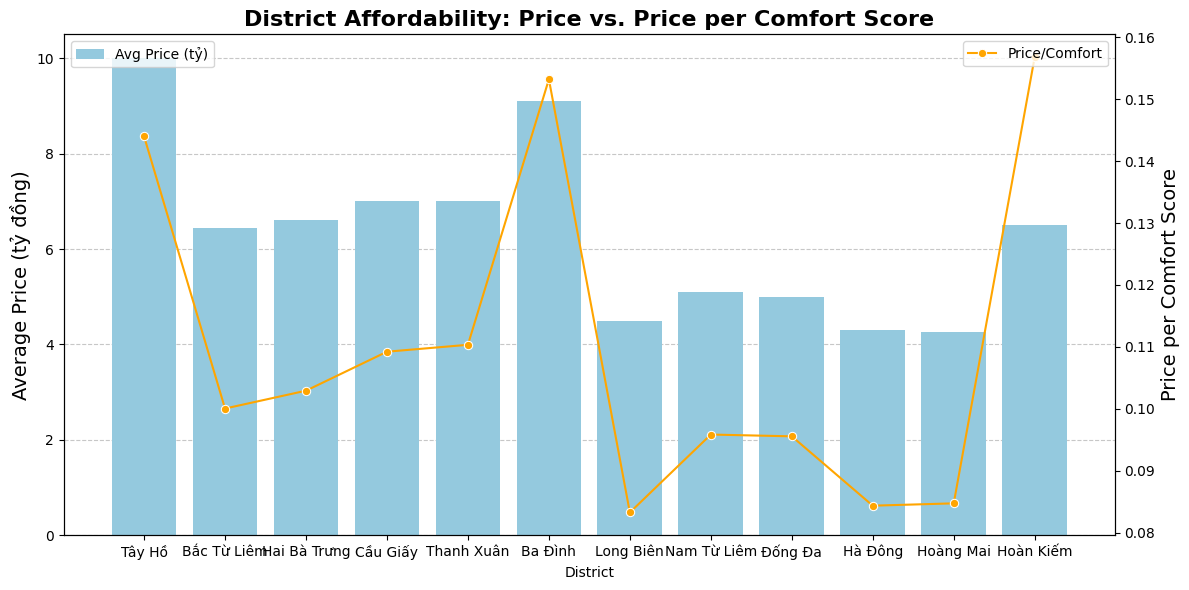

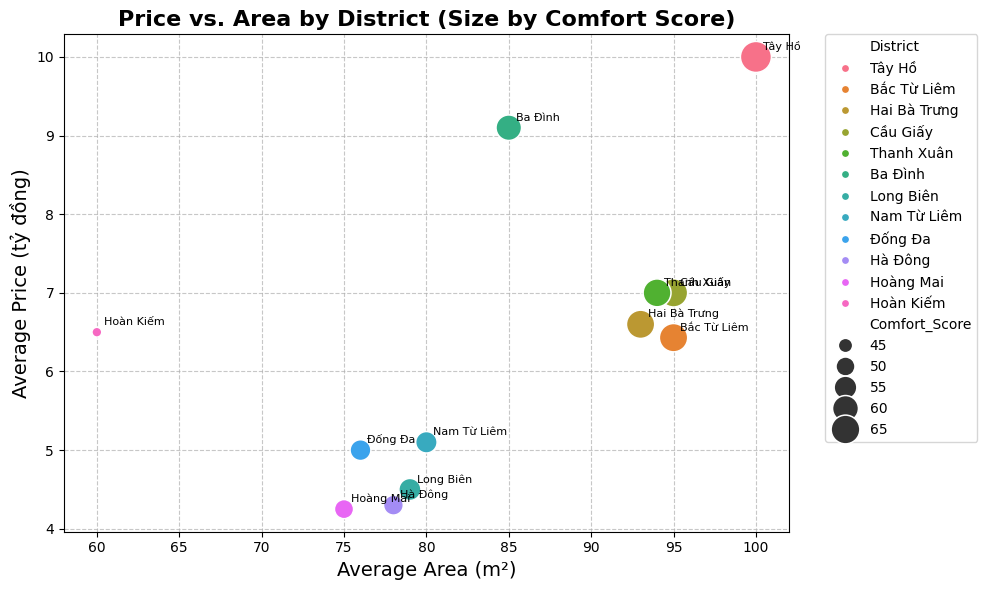

In [ ]:
# Filter valid data and handle missing values
geo_df = df[df['Price'] != -1].copy()  # Exclude "Giá thỏa thuận"
geo_df['District'] = geo_df['Location'].str.split(',').str[-1].str.strip()
geo_df = geo_df[geo_df['District'] != '·']  # Exclude rows with '.' in district
geo_df['Area'] = pd.to_numeric(geo_df['Area'], errors='coerce')

# Split Coordinates into Latitude and Longitude
geo_df[['Latitude', 'Longitude']] = geo_df['Coordinates'].str.split(',', expand=True).astype(float)
geo_df['Distance_km'] = geo_df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], CENTER_LAT, CENTER_LON), axis=1)

# Merge population density into geo_df
geo_df = geo_df.merge(pop_df[['District', 'Population density (people/km2)']], on='District', how='left')
geo_df = geo_df.rename(columns={'Population density (people/km2)': 'Population_Density'})

# Calculate Comfort Score with population density factor
geo_df['Comfort_Score'] = (geo_df['Area'] * 0.7) + (geo_df['Bedrooms'] * 0.3) + (geo_df['Toilets'] * 0.2) - (geo_df['Distance_km'] * 0.4) - (geo_df['Population_Density'] / 8000 * 0.35)

# Aggregate metrics by district
district_metrics = geo_df.groupby('District').agg({
    'Price': 'median',           # Use median instead of mean
    'Price per m²': 'median',
    'Area': 'median',
    'Comfort_Score': 'median',
    'District': 'count'          # Number of listings
}).rename(columns={'District': 'Listing_Count'}).reset_index()

# Calculate affordability metric
district_metrics['Price_per_Comfort'] = district_metrics['Price'] / district_metrics['Comfort_Score']
district_metrics = district_metrics.dropna()

# Sort by Comfort_Score (highest first), then Price and Price per m²
district_metrics_sorted = district_metrics.sort_values(
    by=['Comfort_Score', 'Price', 'Price per m²'], ascending=[False, True, True]
)

# Select columns and round for simplicity
table = district_metrics_sorted[['District', 'Price', 'Price per m²', 'Area', 'Comfort_Score', 'Price_per_Comfort', 'Listing_Count']]
table = table.round({'Price': 2, 'Price per m²': 2, 'Area': 1, 'Comfort_Score': 1, 'Price_per_Comfort': 4})

display(table)

# Visualize: Bar plot of Price and Price per Comfort
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
sns.barplot(x='District', y='Price', data=district_metrics_sorted, color='skyblue', label='Avg Price (tỷ)')
ax2 = plt.twinx()
sns.lineplot(x='District', y='Price_per_Comfort', data=district_metrics_sorted, color='orange', label='Price/Comfort', marker='o')

# Add grid lines
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)
plt.title('District Affordability: Price vs. Price per Comfort Score', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=14)
ax1.set_ylabel('Average Price (tỷ đồng)', fontsize=14)
ax2.set_ylabel('Price per Comfort Score', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Scatter plot: Price vs. Area with Comfort Score
plt.figure(figsize=(10, 6))  
scatter = plt.gca()
sns.scatterplot(x='Area', y='Price', size='Comfort_Score', hue='District', 
                data=district_metrics_sorted, sizes=(50, 500))

# Add grid lines
scatter.grid(True, linestyle='--', alpha=0.7)
scatter.set_axisbelow(True)

plt.title('Price vs. Area by District (Size by Comfort Score)', fontsize=16, fontweight='bold')
plt.xlabel('Average Area (m²)', fontsize=14)
plt.ylabel('Average Price (tỷ đồng)', fontsize=14)

# Add district names as annotations
for idx, row in district_metrics_sorted.iterrows():
    plt.annotate(row['District'], 
                (row['Area'], row['Price']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

# Move legend outside to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()